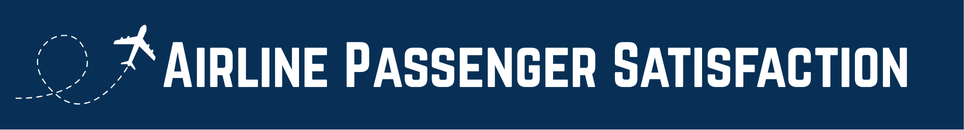
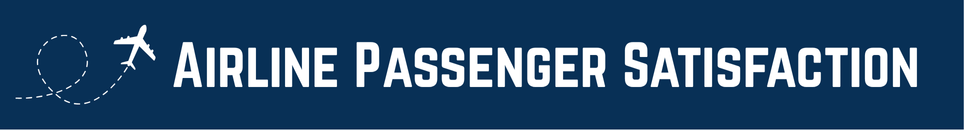

Esra Cesur : https://github.com/EsraCesur4


In [56]:
# Cell 1: Gerekli Kütüphanelerin Yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1 - Veri Setinin İncelenmesi

In [57]:
# Cell 2: Verisetinin Yüklenmesi
df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')

print("Dataset loaded!")
print(f"Shape: {df.shape}") # Veri setinin boyutunu
print(f"Columns: {df.shape[1]}") # Sütun sayısı
print(f"Rows: {df.shape[0]}") # Satır sayısı

Dataset loaded!
Shape: (103904, 25)
Columns: 25
Rows: 103904


In [58]:
# Cell 3: Veri Setini Görelim
print(f"\nFirst 5 rows:")
pd.set_option('display.max_columns', None) # Tüm sütunların sığması için pandas sınırını kaldıralım
df.head() # İlk 5 satır


First 5 rows:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied



#### Burada veri analizi ve istatiksel özetlere katkı sağlamayan unnamed 0 ve id sütünlarını veriden çıkarıyoruz.


In [59]:
# Cell 4 : Gereksiz sütunları veri setinden kaldırıyoruz
df.drop(labels = ['Unnamed: 0', 'id'], axis = 1, inplace= True)

---

# 2 - İstatistiksel Özet

## 2.1 Sayısal Sütunların İstatistiksel Özeti

In [60]:
# Cell 5: Verinin Genel Bilgileri
print("DATA OVERVIEW")
print(df.info()) # Veri kümesi hakkında genel bilgiler

DATA OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding          

In [25]:
# Cell 6 : Sayısal Sütunların Bulunması
numeric_data = df.select_dtypes(include = np.number) # Sayısal veri tipine sahip sütunlar
numeric_cols = numeric_data.columns # Sayısal sütunların isimleri
numeric_data.head() # ilk 5 satır

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [61]:
# Cell 7 : İstatistiksel Özet Bilgileri
numeric_data.describe().T # Ortalama, standart sapma, min, max, median

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


---

## 2.2 Kategorik Sütunların İstatistiksel Özeti

In [27]:
# Cell 8 : Kategorik Sütunların Bulunması 
categorical_data = df.select_dtypes(include=['object'])
categorical_cols = categorical_data.columns
categorical_data.head(5)

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [28]:
# Cell 9 : İstatistiksel Özet Bilgileri
categorical_data.describe().T #en sık görülen değer, bu değerin tekrar sayısı, eşsiz değer sayısı

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


---

# 3 - Eksik Değer Analizi

In [62]:
# Cell 10 : Eksik Veri Analizi
missing_counts = df.isna().sum() # Sütünlarda eksik değer sayısı
total_rows = len(df) # toplam satır sayısı

# Tablolaştırma
missing_counts = missing_counts.reset_index() 
missing_counts.columns = ['Column Name', 'Missing Count']
missing_counts = missing_counts.sort_values(by='Missing Count', ascending=False)
missing_counts['Missing Percentage (%)'] = (missing_counts['Missing Count'] / total_rows) * 100
missing_counts.head()


,Column Name,Missing Count,Missing Percentage (%)
21,Arrival Delay in Minutes,310,0.298352
0,Gender,0,0.000000
12,Seat comfort,0,0.000000
20,Departure Delay in Minutes,0,0.000000
19,Cleanliness,0,0.000000


## 3.1 - Eksik Verilerle Başa Çıkmanın Farklı Yolları

### A. Silme Yöntemleri
#### 1) Satır Bazlı Silme (Listwise Deletion):

- Yöntem: Belirli bir sütunda eksik değer içeren satırların tamamı silinir.  
- Ne Zaman Kullanılır: Eksik veri oranı küçükse (%5’ten az)

#### 2) Sütun Bazlı Silme:

- Yöntem: Eğer bir sütunun eksik veri oranı çok yüksekse (%75’ten fazla), o sütunun tamamı kaldırılır.
- Ne Zaman Kullanılır: Bir sütun neredeyse tamamen boşsa ve bilgi katkısı çok azsa veya yoksa.

### B. Atama (İmputation) Yöntemleri – Eksik Değerlerin Yerine Yeni Değer Koyma

#### **Sayısal Veriler için:**

#### 1) Ortalama ile Doldurma (Mean Imputation):

- Yöntem: Eksik değerler, ilgili sütundaki gözlemlenen değerlerin ortalaması ile doldurulur.
- Ne Zaman Kullanılır: Eksik veri miktarı azsa ve veri dağılımı simetrikse (çok çarpık (skewed) değilse).

- Varyansı azaltır: Dağılımı daraltır ve standart hata tahminlerini küçültebilir.

- Korelasyonları sıfıra yaklaştırabilir.

- Ortalama uç değerlere karşı hassastır.

#### 2) Medyan ile Doldurma (Median Imputation):

- Yöntem: Eksik değerler, ilgili sütundaki gözlemlenen değerlerin medyanı ile doldurulur.
- Ne Zaman Kullanılır: Veri dağılımı çarpıksa (skewed) veya aykırı değerler varsa, çünkü medyan, ortalamaya göre daha dayanıklıdır.

- Aykırı değerlere karşı dayanıklıdır, basit bir yöntemdir.

#### 3) İleriye Doldurma (Forward Fill - ffill) / Geriye Doldurma (Backward Fill - bfill):

- Yöntem: Sıralı veride eksik değer, bir önceki eksik olmayan değer (ffill) veya bir sonraki eksik olmayan değer (bfill) ile doldurulur.
- Ne Zaman Kullanılır: Zaman serisi veya sıralı verilerde, verilerin sırası anlamlı olduğunda.

- Sıralı verilerdeki eğilimleri korur.

**Hangi yöntemi kullanacağımıza karar vermede dağılım grafiklerini inceleyip yorumlamamız gerekir.**

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Density'>

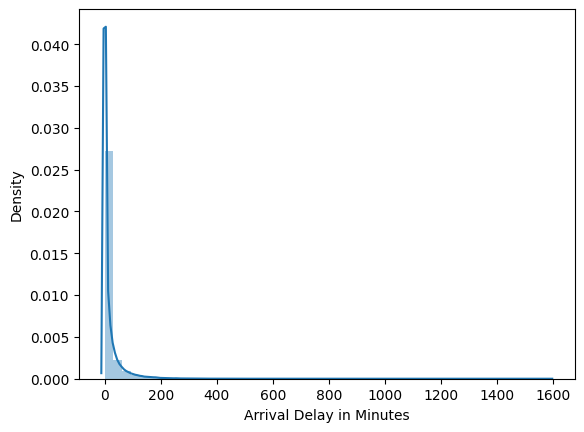

In [63]:
# Cell 11: Arrival Delay in Minutes Dağılımı
sns.distplot(df['Arrival Delay in Minutes']) # histogram + KDE (yoğunluk eğrisi) çizer

### Dağılım Grafiği Analizi

Burada oldukça çarpık (skewed) bir dağılım grafiğimiz var. En belirgin özellik, verinin aşırı derecede pozitif çarpıklık göstermesidir. Uzun kuyruk, uzun gecikmeli uçuşlar gibi önemli aykırı değerlere işaret eder. Bu dağılım göz önüne alındığında, Ortalama (Mean), Medyan (Median) ve İleri/Geriye Doldurma (Forward/Backward Fill) yöntemleri arasında Medyan ile Doldurma en doğru tercig olacaktır.

Ortalama, aykırı değerlere ve çarpık dağılımlara karşı oldukça hassastır, bizim durumumuza uygun değildir.

Medyan ise, aykırı değerlere ve çarpık dağılımlara karşı dayanıklıdır.

**Aşağıda örnek bir olarak doldurma işlemi gerçekleştirilmiştir. Analizi etkilememesi için doldurulmuş veri seti ileriki adımlarda ve analizlerde kullanılmamakta, veri setinin orjinali ile çalışmaktayız.**

In [79]:
# Cell 12: Eksik Değerlerin Medyan ile Doldurulması
median_delay = df['Arrival Delay in Minutes'].median() # medyan değerinin hesaplanması
df_imputed = df.copy() # Orijinal veri setini bozmamak için kopyasını oluşturuyoruz
df_imputed['Arrival Delay in Minutes'].fillna(median_delay, inplace=True) # NaN değerlerin medyan ile doldurulması
df_imputed.head() # ilk 5 satır

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


---

# 4 - Aykırı Değer Analizi

## 4.1 IQR Yöntemi

In [70]:
# Cell 14: Aykırı Değer Analizi - IQR Yöntemi
print("OUTLIER ANALYSIS (IQR METHOD)")

# Her sayısal sütun için aykırı değer analizi yapılır
if len(numeric_cols) > 0:
    for col in numeric_cols:
        # 1. çeyrek (Q1) ve 3. çeyrek (Q3) değerlerinin hesaplanması
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1 # IQR'nin hesaplanması
        
        # Alt ve üst sınırlar belirleniyor (1.5 * IQR kuralı)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Belirlenen sınırların dışında kalan veriler aykırı kabul ediliyor
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Bulunan değerlerin yazdırılması
        print("\n" + col + ":")
        print("  Lower bound:", lower_bound)
        print("  Upper bound:", upper_bound)
        print("  Number of outliers:", len(outliers))
        print("  Percentage of outliers:", round(len(outliers)/len(df)*100, 2), "%") 

OUTLIER ANALYSIS (IQR METHOD)

Age:
  Lower bound: -9.0
  Upper bound: 87.0
  Number of outliers: 0
  Percentage of outliers: 0.0 %

Flight Distance:
  Lower bound: -1579.5
  Upper bound: 3736.5
  Number of outliers: 2291
  Percentage of outliers: 2.2 %

Inflight wifi service:
  Lower bound: -1.0
  Upper bound: 7.0
  Number of outliers: 0
  Percentage of outliers: 0.0 %

Departure/Arrival time convenient:
  Lower bound: -1.0
  Upper bound: 7.0
  Number of outliers: 0
  Percentage of outliers: 0.0 %

Ease of Online booking:
  Lower bound: -1.0
  Upper bound: 7.0
  Number of outliers: 0
  Percentage of outliers: 0.0 %

Gate location:
  Lower bound: -1.0
  Upper bound: 7.0
  Number of outliers: 0
  Percentage of outliers: 0.0 %

Food and drink:
  Lower bound: -1.0
  Upper bound: 7.0
  Number of outliers: 0
  Percentage of outliers: 0.0 %

Online boarding:
  Lower bound: -1.0
  Upper bound: 7.0
  Number of outliers: 0
  Percentage of outliers: 0.0 %

Seat comfort:
  Lower bound: -2.5
  Upp

### Aykırı Değer Analizi Sonuçları

Analiz sonuçlarına göre, veri setinde en çok aykırı değer kalkış gecikmeleri (%13.98), varış gecikmeleri (%13.43) ve check-in hizmetinde (%12.41) görülmektedir. Uçuş mesafesinde de düşük oranda (%2.2) aykırı değer bulunurken, yaş ve hizmet kalitesi değerlendirmeleri (wifi, yemek, koltuk konforu vb.) genel olarak normal dağılım göstermektedir. Bu bulgular, havayolu operasyonlarında zaman yönetimi ve check-in süreçlerinin iyileştirilmesi gereken alanlar olduğunu gösterebilir.


## 4.2 Box Plot Yöntemi

Box Plot Yönteminde de IQR Yöntemi ile aynı sonuçlar elde edilmiştir. 

OUTLIER DETECTION (BOX PLOT METHOD)


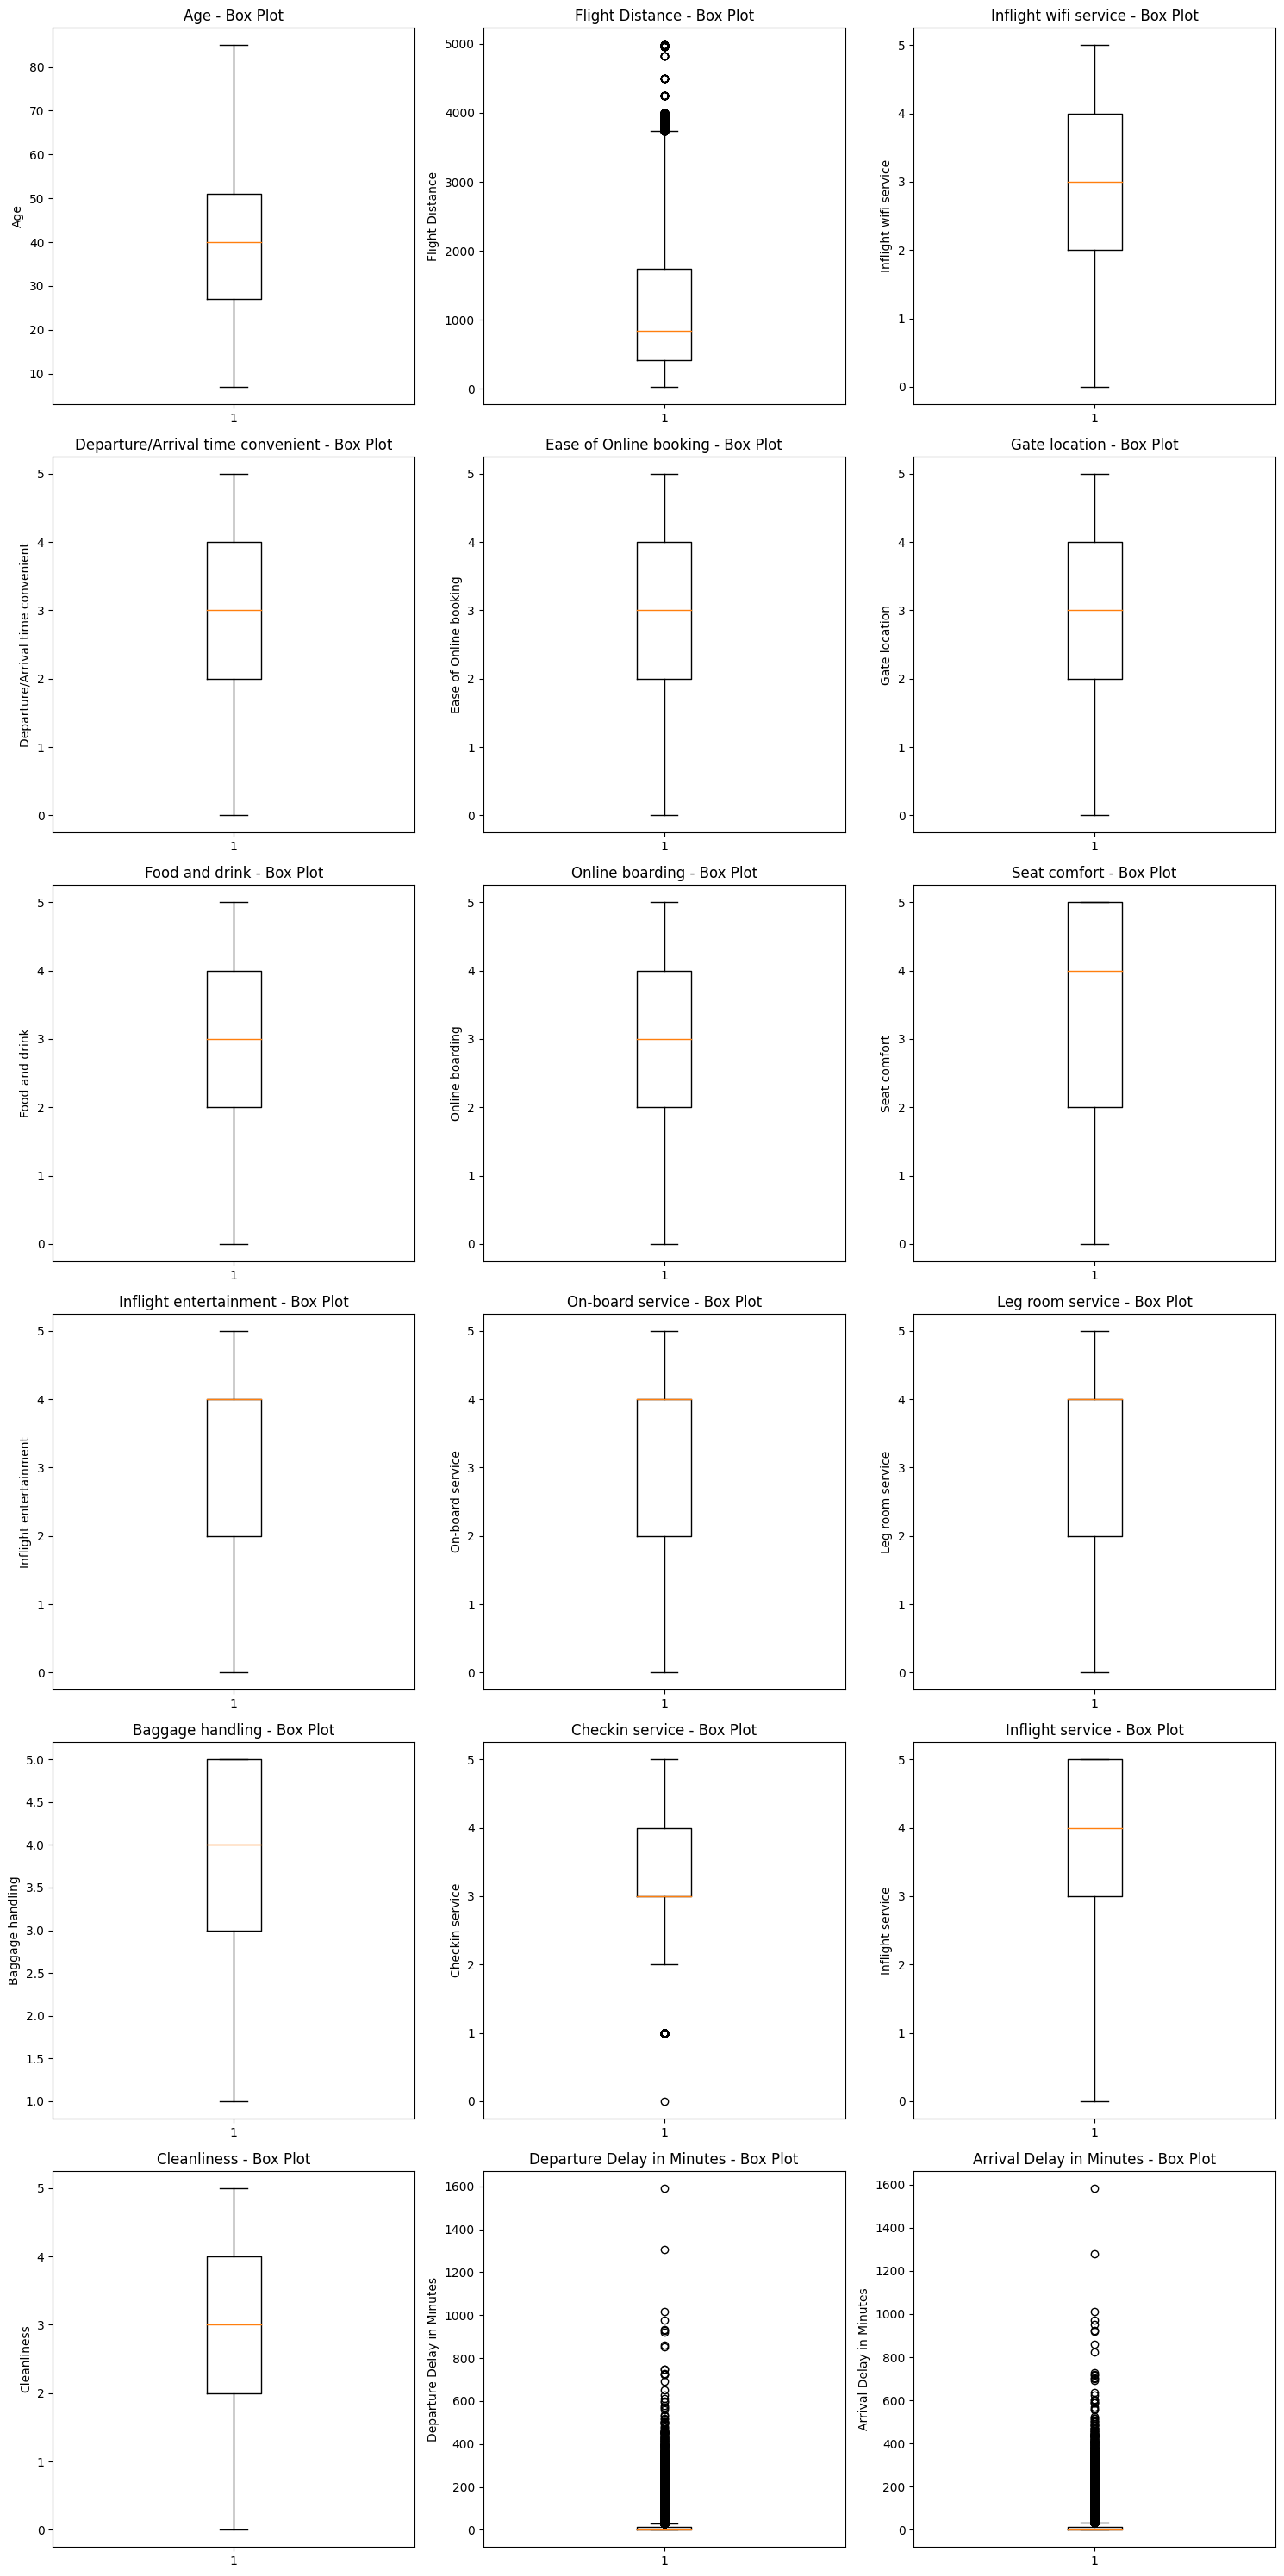

In [71]:
# Cell 15: Aykırı Değer Tespiti - Box Plot Yöntemi

# Her sayısal sütun için Box Plot çizilmesi
if len(numeric_cols) > 0:
    print("OUTLIER DETECTION (BOX PLOT METHOD)")
    
    n_cols = 3 # sütun sayısı
    n_rows = 6 # satur sayısı
    
    plt.figure(figsize=(15, 5 * n_rows)) # grafik boyutu

    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.boxplot(df[col].dropna())
        plt.title(f'{col} - Box Plot')
        plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()

---

# 5 - Görselleştirme

## 5.1 Sayısal Verilerin Görselleştirmesi

SAYISAL DEĞERLERİN DAĞILIMI


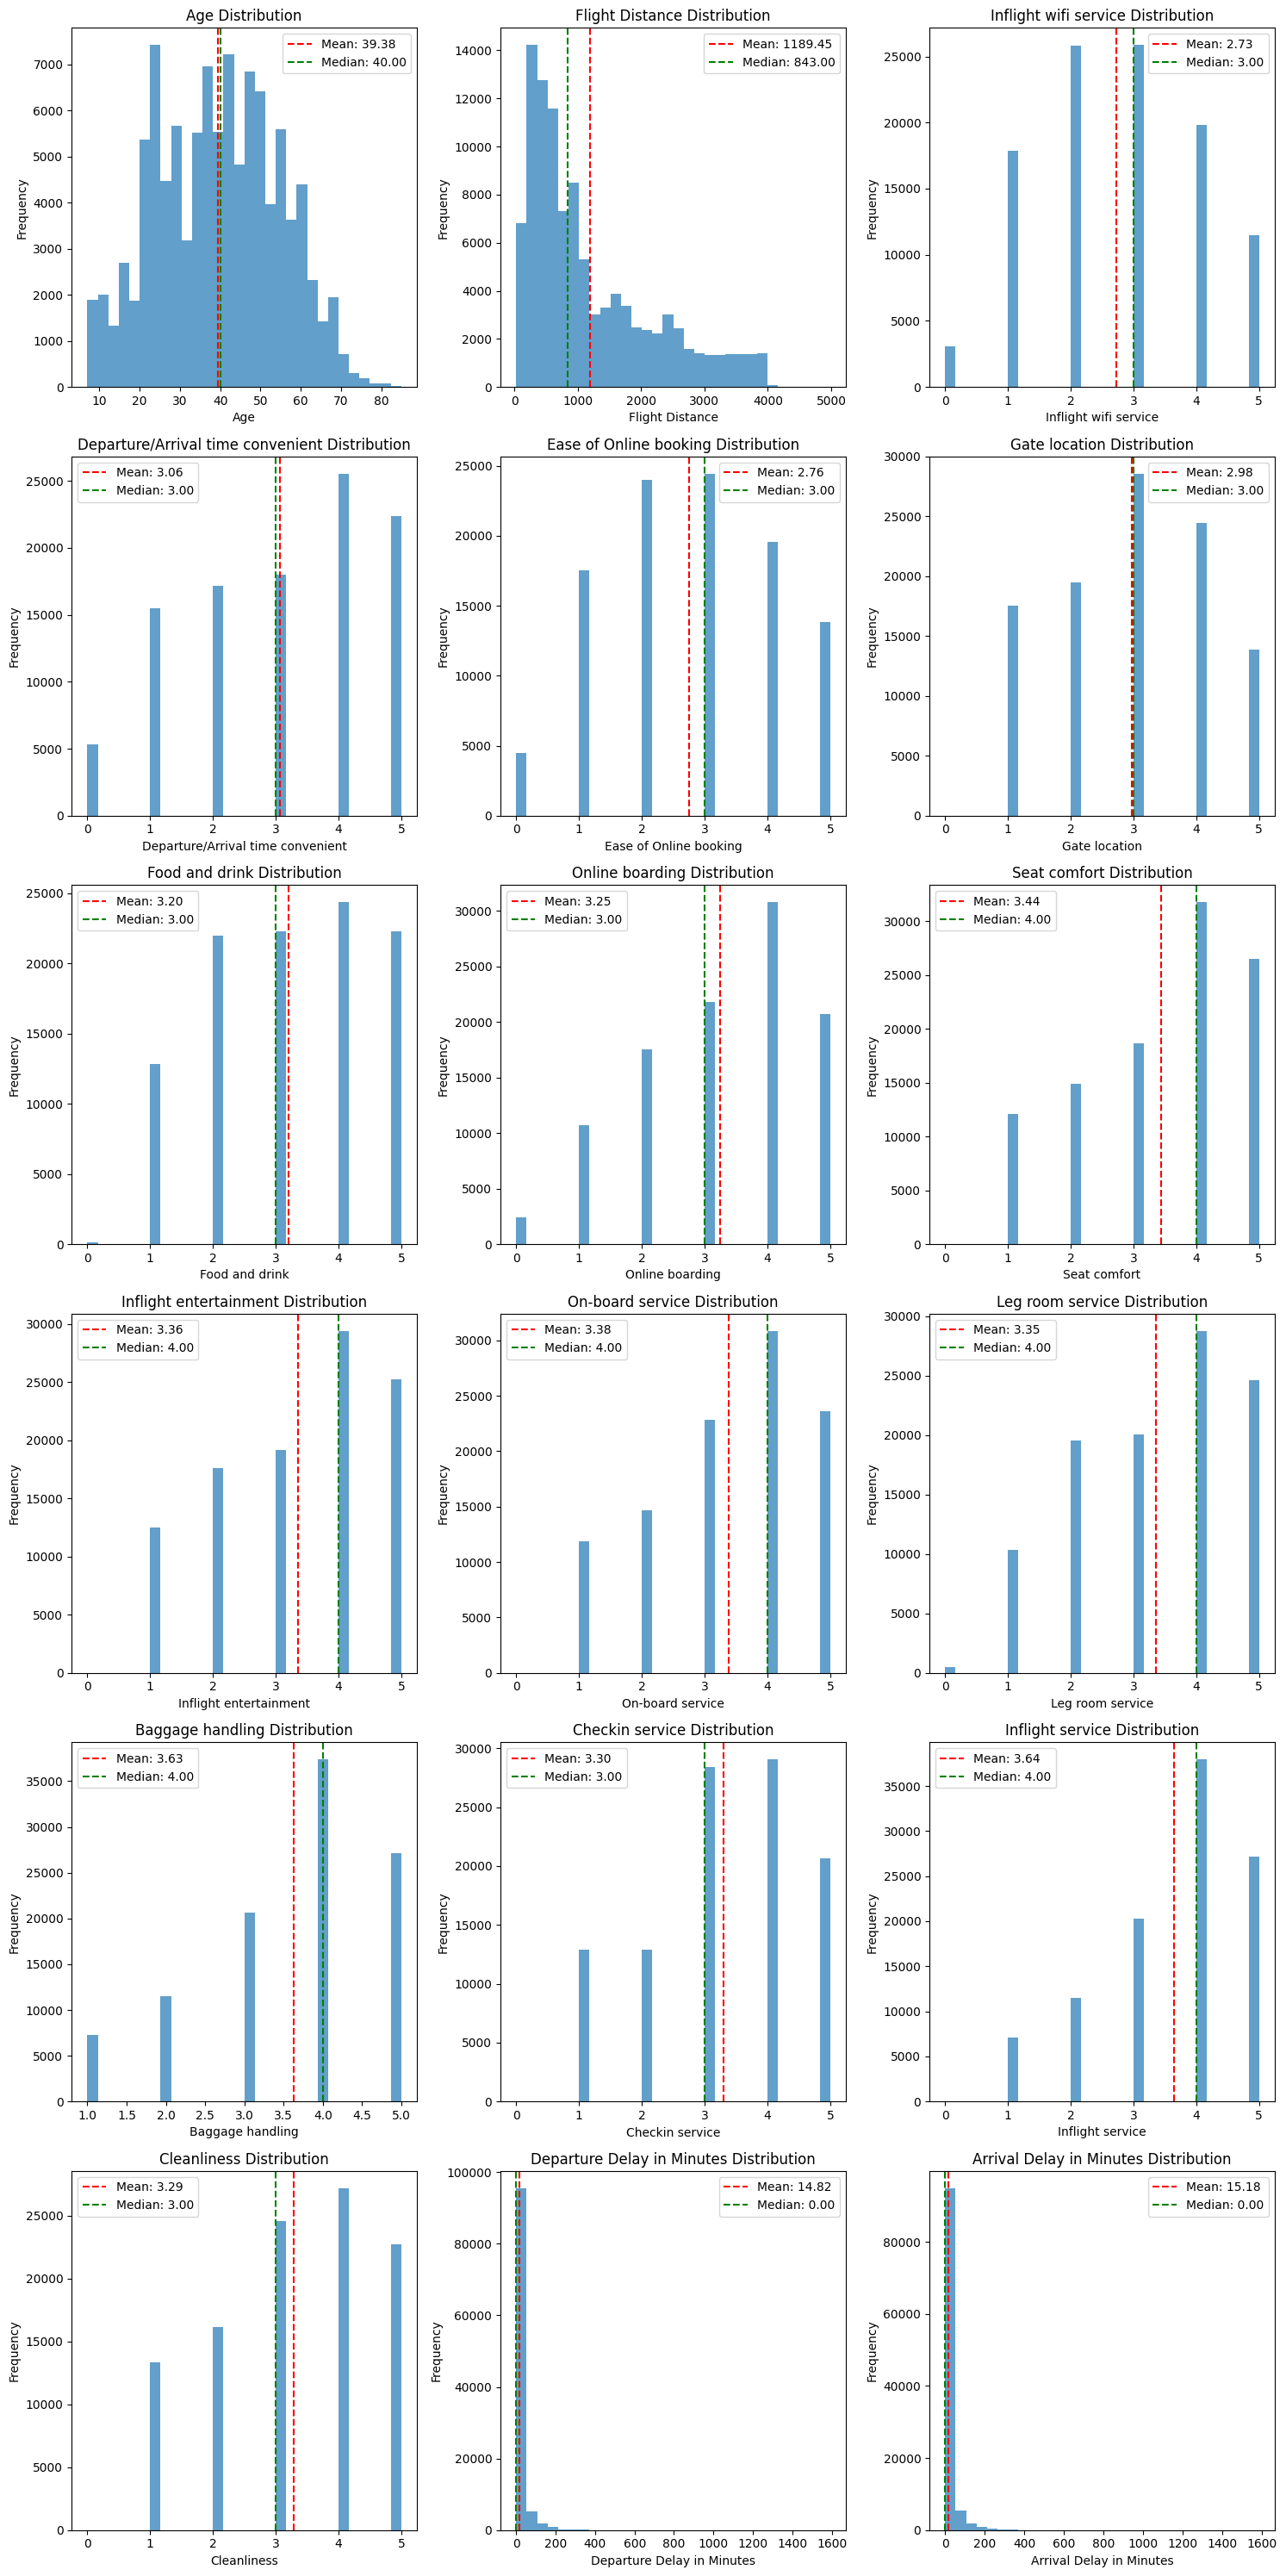

In [75]:
# Cell 16: Dağılım Grafikleri - Sayısal Veriler
if len(numeric_cols) > 0:
    print("SAYISAL DEĞERLERİN DAĞILIMI")
    
    # sütun ve satur boyutları
    n_cols = 3
    n_rows = 6
    
    plt.figure(figsize=(15, 5 * n_rows)) # grafik boyutu

    # Her sütun için grafiklerin çizilmesi
    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.hist(df[col], bins=30, alpha=0.7)
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
        # Ortalama (kırmızı) ve medyan (yeşil) çizgilerinin eklenmesi
        plt.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
        plt.axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.2f}')
        plt.legend()
    
    plt.tight_layout()
    plt.show()


### Dağılım Grafiklerinin Analizi

**1) Yaş Dağılımı:** Müşteri yaşları normal dağılım göstermekte olup, ortalama 39.38 yaş civarında yoğunlaşmaktadır. 25-55 yaş aralığında en yüksek müşteri yoğunluğu görülmekte ve bu da havayolunun ağırlıklı olarak çalışan yaş grubundaki yolculara hizmet verdiğini göstermektedir.

**2) Uçuş Mesafesi Dağılımı:** Uçuş mesafeleri sağa çarpık dağılım sergilemekte, çoğu uçuş 0-2000 mil arasında kısa-orta mesafe kategorisinde yoğunlaşmaktadır. Bu durum havayolunun bölgesel veya iç hat uçuşlarda daha aktif olduğunu göstermektedir.

**3) Uçak İçi WiFi Hizmeti:** WiFi hizmeti değerlendirmeleri 3-4 puan arasında yoğunlaşmış durumda olup, ortalama 2.73 ile orta düzey memnuniyet göstermektedir. Dağılım nispeten uniform yapıda olup belirgin bir yoğunlaşma noktası bulunmamaktadır.

**4) Kalkış/Varış Saati Uygunluğu:** Bu hizmet 3 puan etrafında güçlü bir yoğunlaşma göstermekte ve ortalama 3.06 ile tatmin edici düzeyde değerlendirilmektedir. Müşterilerin çoğu uçuş saatlerini uygun bulmaktadır.

**5) Online Rezervasyon Kolaylığı:** Online booking hizmeti 3 puan civarında yoğunlaşmış olup ortalama 2.76 ile geliştirilmesi gereken bir alan olarak öne çıkmaktadır. Özellikle düşük puanlar da önemli oranda bulunmaktadır.

**6) Kapı Konumu:** Gate location değerlendirmeleri 3 puan etrafında yoğunlaşmış ve ortalama 2.98 ile orta düzey memnuniyet göstermektedir. Havaalanı içindeki kapı konumları genel olarak uygun bulunmaktadır.

**7) Yemek ve İçecek:** Food and drink hizmeti 3 puan civarında güçlü yoğunlaşma göstermekte olup ortalama 3.20 ile tatmin edici düzeydedir. Bu hizmet genel olarak müşteri beklentilerini karşılamaktadır.

**8) Online Boarding:** Online boarding hizmeti özellikle 3-4 puan arasında yoğunlaşmış olup ortalama 3.25 ile başarılı bir hizmet alanı olarak değerlendirilmektedir.

**9) Koltuk Konforu:** Seat comfort değerlendirmeleri 3-4 puan arasında dağılım göstermekte ve ortalama 3.44 ile müşterilerin genel olarak memnun olduğu bir alan olarak öne çıkmaktadır.

**10) Uçak İçi Eğlence:** Inflight entertainment hizmeti 4 puan etrafında güçlü bir yoğunlaşma göstermekte ve ortalama 3.36 ile başarılı bir hizmet alanıdır. Müşteriler bu hizmetten genel olarak memnundur.

**11) Uçak İçi Hizmet:** On-board service değerlendirmeleri 4 puan civarında yoğunlaşmış olup ortalama 3.38 ile tatmin edici düzeydedir. Kabin ekibi hizmetleri başarılı bulunmaktadır.

**12) Bacak Alanı:** Leg room service 4 puan etrafında belirgin yoğunlaşma göstermekte ve ortalama 3.35 ile müşteri memnuniyeti sağlayan bir alan olarak değerlendirilmektedir.

**13) Bagaj Hizmetleri:** Baggage handling en başarılı hizmet alanlarından biri olup 4 puan civarında güçlü yoğunlaşma ve ortalama 3.63 ile yüksek memnuniyet göstermektedir.

**14) Check-in Hizmeti:** Check-in service 3-4 puan arasında dağılım göstermekte ve ortalama 3.30 ile tatmin edici düzeyde değerlendirilmektedir.

**15) Genel Uçuş Hizmeti:** Inflight service 4 puan etrafında yoğunlaşmış olup ortalama 3.64 ile en yüksek memnuniyet oranlarından birine sahiptir. Bu alan havayolunun güçlü yanlarından biridir.

**16) Temizlik:** Cleanliness değerlendirmeleri 3 puan civarında yoğunlaşmış ve ortalama 3.29 ile orta düzey memnuniyet göstermektedir. Hijyen standartları genel olarak kabul edilebilir düzeydedir.

**17) Kalkış Gecikmesi:** Departure delay dağılımı sıfır dakika etrafında yoğunlaşmış olup çoğu uçuş zamanında kalkış yapmaktadır. Ancak sağa çarpık yapı uzun gecikmelerin de yaşandığını göstermektedir.

**18) Varış Gecikmesi:** Arrival delay de benzer şekilde sıfır dakika civarında yoğunlaşmış olup çoğu uçuş zamanında varmaktadır. Sağa çarpık dağılım yapısı operasyonel zorlukların zaman zaman yaşandığını işaret etmektedir.

---


**Yaş gruplarını daha belirgin aralıklara bölerek ('18-25', '26-35', '36-50', '51-65', '65+') yorum yapmayı kolaylaştırabiliriz.**

AGE GROUPS ANALYSIS
Age group distribution:
Age_Group
18-25    22613
26-35    18848
36-50    35698
51-65    22739
65+       4006
Name: count, dtype: int64


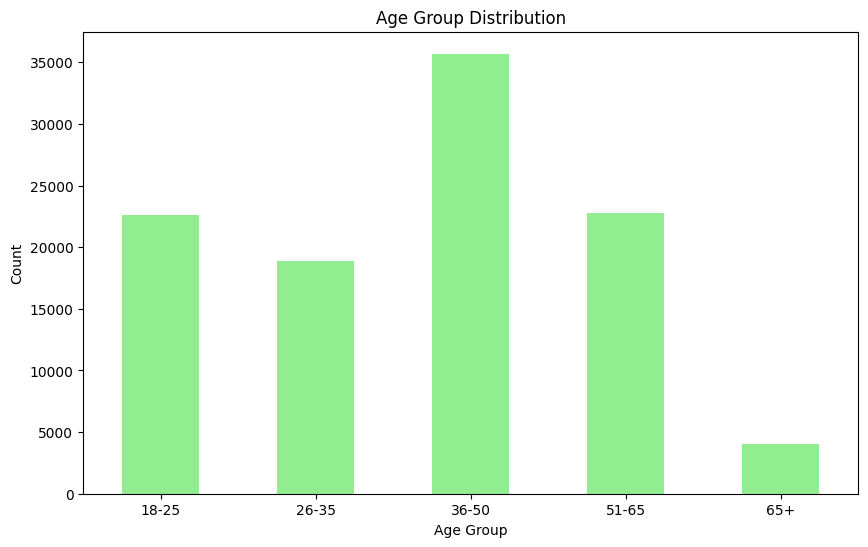

In [85]:
# Cell 17: Yaş Grupları Analizi
print("AGE GROUPS ANALYSIS")

if 'Age' in df.columns:
    # Yaş aralıklarının oluşturulması
    df['Age_Group'] = pd.cut(df['Age'], 
                            bins=[0, 25, 35, 50, 65, 100], 
                            labels=['18-25', '26-35', '36-50', '51-65', '65+']) # 5 yaş aralığı

    # Her yaş grubundaki yolcu sayısı
    age_group_counts = df['Age_Group'].value_counts().sort_index()
    print("Age group distribution:")
    print(age_group_counts)
    
    # Yaş gruplarının dağılımlarının görselleştirilmesi
    plt.figure(figsize=(10, 6))
    age_group_counts.plot(kind='bar', color='lightgreen')
    plt.title('Age Group Distribution')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

Yaş grubu dağılımı analiz edildiğinde, havayolunun müşteri profilinin 36-50 yaş grubunda yoğunlaştığı görülmektedir. Bu grubu 18-25 ve 51-65 yaş aralıkları takip etmekte, 26-35 yaş grubu ise daha düşük temsil edilmektedir. 65 yaş üstü müşteriler ise en küçük segmenti oluşturmaktadır. Bu dağılım, havayolunun ağırlıklı olarak çalışma çağındaki ve orta yaş grubundaki yolculara hizmet verdiğini göstermektedir.

---


Satisfaction by Age Group (%):
satisfaction  neutral or dissatisfied  satisfied
Age_Group                                       
18-25                       71.918808  28.081192
26-35                       62.452250  37.547750
36-50                       46.223878  53.776122
51-65                       48.700471  51.299529
65+                         81.627559  18.372441


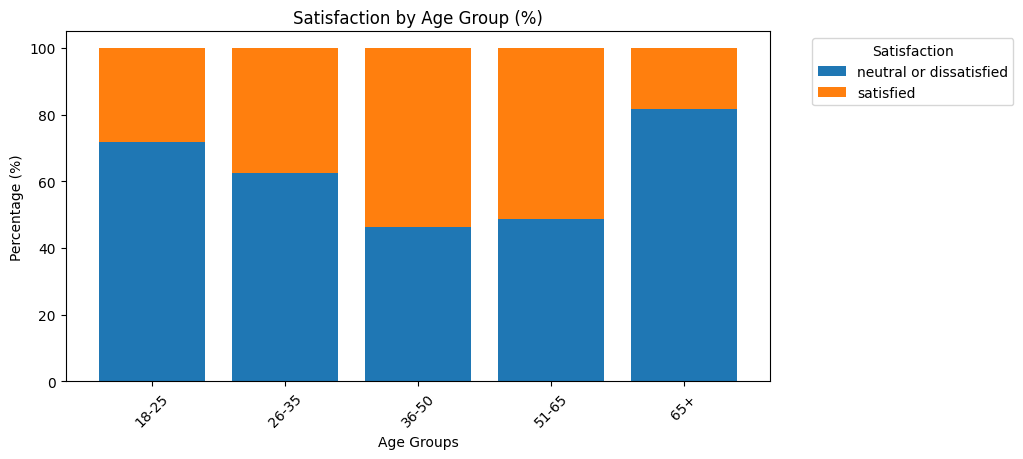

In [87]:
# Cell 18: Yaş Gruplarının Memnuniyet Analizi
# Yaş gruplarına göre memnuniyet yüzdelerinin hesaplanması
if 'satisfaction' in df.columns:

    sat_by_age = pd.crosstab(df['Age_Group'], df['satisfaction'], normalize='index') * 100
    print("\nSatisfaction by Age Group (%):")
    print(sat_by_age)
    
    # Yığınlı Bar Grafiği
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, 2)
    sat_by_age.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.8)
    plt.title('Satisfaction by Age Group (%)')
    plt.xlabel('Age Groups')
    plt.ylabel('Percentage (%)')
    plt.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

### Yaş Gruplarına Göre Memnuniyet Analizi

Yaş gruplarına göre memnuniyet analizi, yaşın müşteri memnuniyeti üzerinde önemli bir etkisi olduğunu ortaya koymaktadır. En yüksek memnuniyet oranı 36-50 yaş grubunda (%54) görülürken, bunu 51-65 yaş grubu (%51) takip etmektedir. Dikkat çekici şekilde, en genç (18-25) ve en yaşlı (65+) müşteri grupları en düşük memnuniyet oranlarını göstermektedir (sırasıyla %28 ve %18). 26-35 yaş grubu da nispeten düşük memnuniyet (%38) sergilemektedir. Bu durum, orta yaş grubundaki müşterilerin havayolu hizmetlerinden daha memnun olduğunu, genç ve yaşlı yolcuların ise farklı beklenti ve ihtiyaçları nedeniyle daha eleştirel yaklaştığını göstermektedir.

---

SERVICE RATINGS ANALYSIS
Found 14 rating columns:
['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

Average ratings:
Inflight service                     3.640428
Baggage handling                     3.631833
Seat comfort                         3.439396
On-board service                     3.382363
Inflight entertainment               3.358158
Leg room service                     3.351055
Checkin service                      3.304290
Cleanliness                          3.286351
Online boarding                      3.250375
Food and drink                       3.202129
Departure/Arrival time convenient    3.060296
Gate location                        2.976883
Ease of Online booking               2.756901
Inflight wifi service              

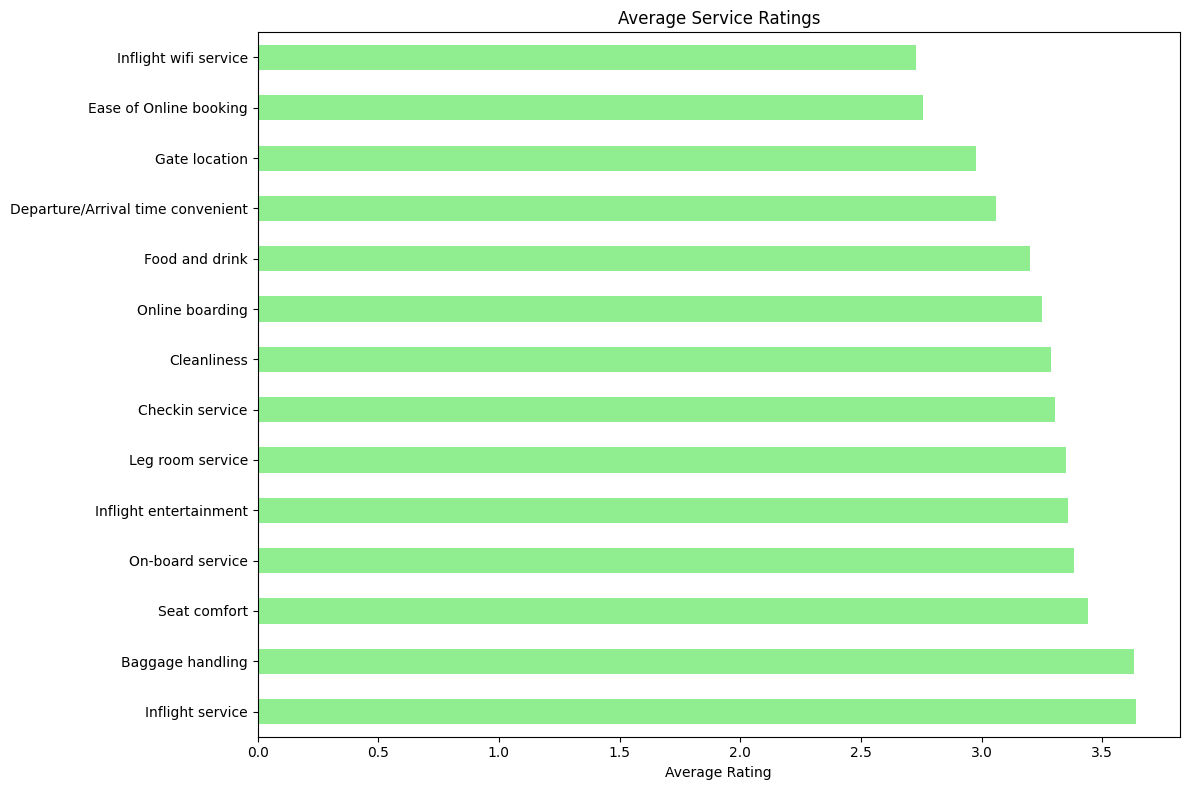

In [91]:
# Cell 19: Hizmet Puanları Analizi
print("SERVICE RATINGS ANALYSIS")

# Hizmet puanları içeren sütunların tespiti (0-5 aralığında)
rating_cols = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        unique_vals = df[col].dropna().unique()
        # 0-5 aralığının bulunması
        if len(unique_vals) <= 6 and min(unique_vals) >= 0 and max(unique_vals) <= 5:
            rating_cols.append(col)

# Her sütun için
if rating_cols:
    print(f"Found {len(rating_cols)} rating columns:")
    print(rating_cols)
    
    # Ortalama Hesabı
    avg_ratings = df[rating_cols].mean().sort_values(ascending=False)
    print(f"\nAverage ratings:")
    print(avg_ratings)
    
    # Ortalama Görselleştirilmesi
    plt.figure(figsize=(12, 8))
    avg_ratings.plot(kind='barh', color='lightgreen')
    plt.title('Average Service Ratings')
    plt.xlabel('Average Rating')
    plt.tight_layout()
    plt.show()

### Hizmet Puanları Analizi

Hizmet puanları analizi, havayolunun performansında belirgin farklılıklar olduğunu göstermektedir. En yüksek memnuniyet Inflight service (3.64) ve Baggage handling (3.63) alanlarında görülürken, en düşük puanlar Inflight wifi service (2.73) ve Ease of Online booking (2.76) hizmetlerinde yer almaktadır. Genel olarak uçak içi hizmetler (koltuk konforu, eğlence, yemek-içecek) 3.2-3.6 aralığında tatmin edici performans sergilerken, dijital hizmetler (wifi, online booking) ve yer hizmetleri (gate location) 2.7-3.0 aralığında kalarak geliştirilmesi gereken alanlar olarak öne çıkmaktadır. **Havayolunun operasyonel hizmetlerde başarılı olduğu ancak teknoloji tabanlı hizmetlerde müşteri beklentilerini karşılamakta zorlandığı görülmektedir.**

---

CORRELATION ANALYSIS


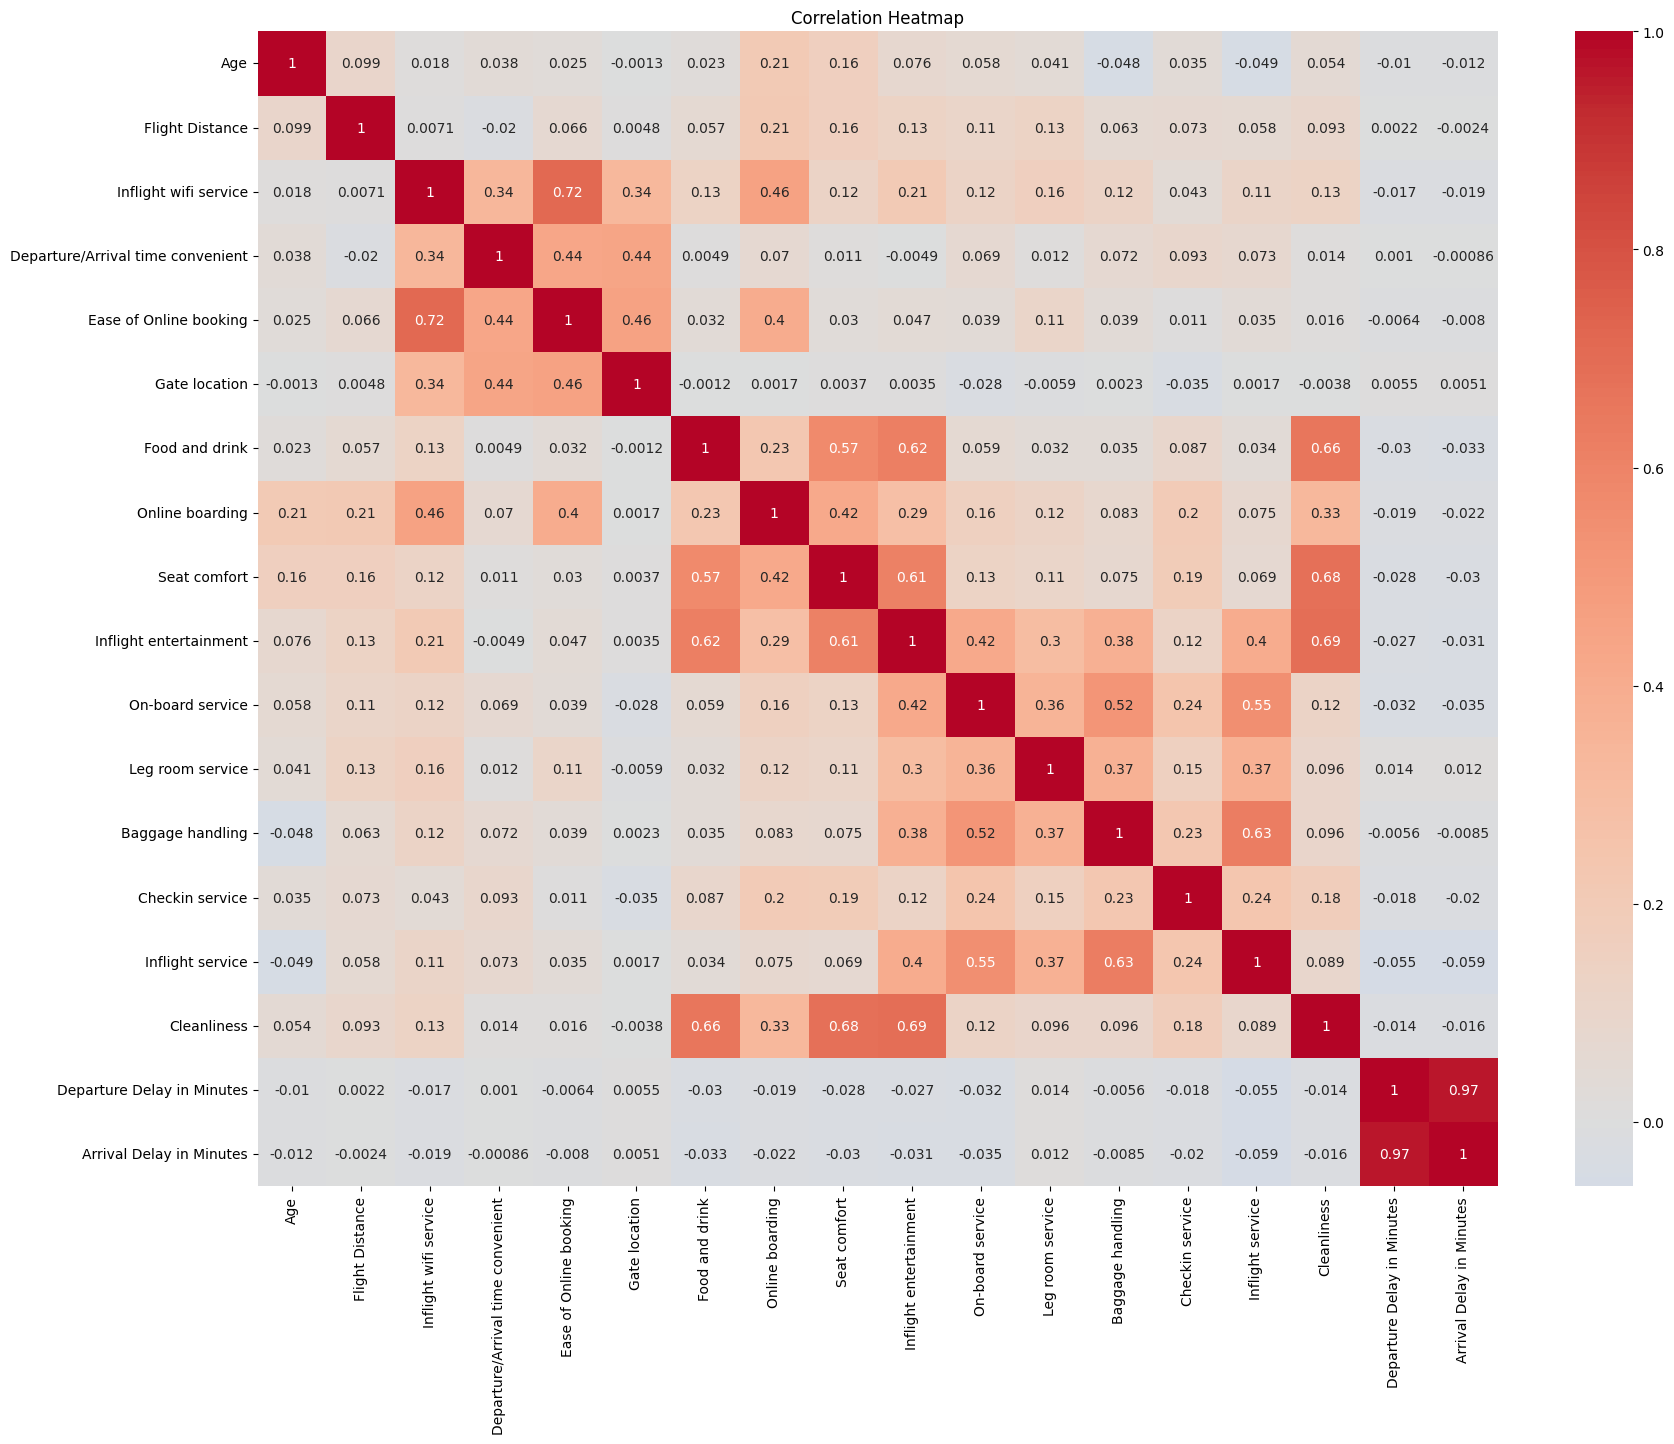

In [96]:
# Cell 20: Korelasyon Analizi
if len(numeric_cols) > 1:
    print("CORRELATION ANALYSIS")
    
    # Sayısal sütunlar arasındaki Pearson korelasyon katsayılarının hesaplanması
    correlation = df[numeric_cols].corr()
    
    # Korelasyon Matrisinin Görselleştirilmesi
    plt.figure(figsize=(20, 15))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.show()

### Korelasyon Matrisi Analizi

- En güçlü korelasyon beklendiği üzere kalkış ve varış gecikmeleri arasında görülmektedir (0.97), bu da operasyonel sorunların birbirine zincirleme etki ettiğini göstermektedir.
- Hizmet kategorileri açısından belirgin kümelenmeler gözlenmektedir. Teknoloji tabanlı hizmetler olan online booking ve WiFi service arasında güçlü pozitif korelasyon (0.72) bulunması, dijital altyapının bütünsel kalitesini yansıtmaktadır. Benzer şekilde, fiziksel konfor ve hijyen hizmetleri olan seat comfort, cleanliness ve inflight entertainment arasında yüksek korelasyonlar (0.68-0.69) görülmekte, bu da uçak içi fiziksel ortamın müşteri deneyimindeki bütünsel etkisini ortaya koymaktadır.
- Uçak içi operasyonel hizmetler grubu (food&drink, on-board service, inflight service) birbirleriyle orta seviyede pozitif korelasyonlar (0.4-0.6) sergilemekte, kabin ekibi performansının farklı hizmet alanlarında tutarlı olduğunu göstermektedir. Özellikle baggage handling ile inflight service arasındaki 0.63 korelasyon, genel hizmet kalitesi standartlarının tutarlılığını işaret etmektedir.
- Demografik faktörler açısından, yaş ve uçuş mesafesi hizmet değerlendirmeleriyle genel olarak zayıf korelasyonlar göstermektedir (çoğu 0.1'in altında), bu da memnuniyetin demografik özelliklerden çok gerçek hizmet kalitesine bağlı olduğunu ortaya koymaktadır.
- Gate location ve departure/arrival time convenient arasındaki orta düzey korelasyon (0.44) ise havaalanı operasyonlarının birbiriyle bağlantılı olduğunu göstermektedir.
  
---

## 5.2 Kategorik Verilerin Görselleştirilmesi

KATEGORİK DEĞERLERİN DAĞILIMI


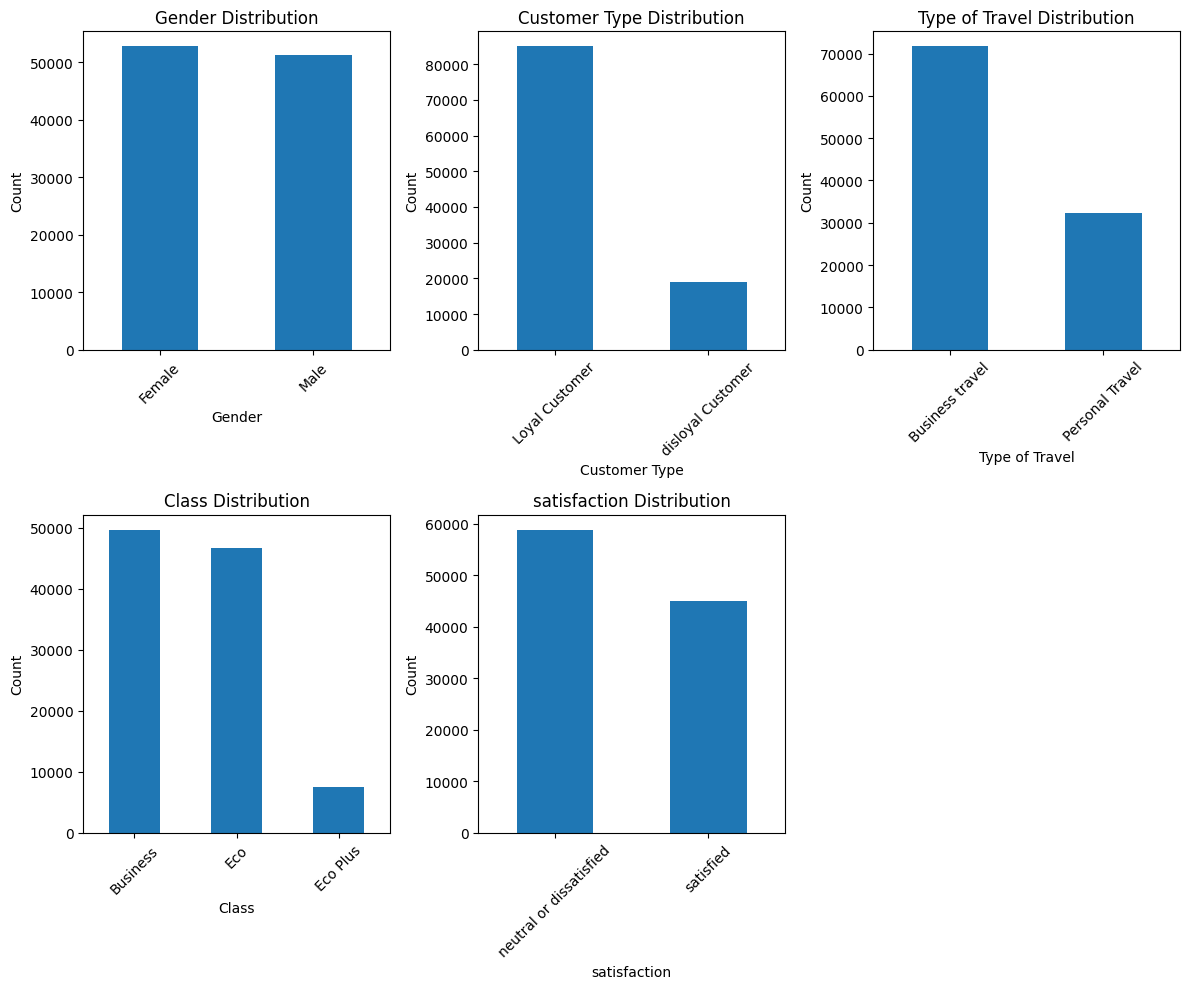

In [98]:
# Cell 21: Dağılım Grafikleri - Kategorik Veriler
if len(categorical_cols) > 0:
    print("KATEGORİK DEĞERLERİN DAĞILIMI")

    # Grafik düzeni ve boyutu
    n_cols = 3
    n_rows = 2
    plt.figure(figsize=(12, 5 * n_rows))

    # Her sütunun grafiklerinin çizilmesi
    for i, col in enumerate(categorical_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        df[col].value_counts().plot(kind='bar') # Sınıf frekansının hesaplanması
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

### Kategorik Dağılım Analizi

Cinsiyet dağılımı dengeli bir yapı gösterirken (yaklaşık %50-50), müşteri sadakati açısında olumlu bir tablo görülmektedir (%82 sadık müşteri). Seyahat türü açısından iş seyahatleri kişisel seyahatlerin 2.25 katı oranında (%69'a karşı %31) ağırlık kazanmakta, bu da havayolunun kurumsal odaklı bir konumlandırmaya sahip olduğunu göstermektedir. Sınıf dağılımında Business ve Economy sınıfları neredeyse eşit oranlarda (%48-%45) tercih edilirken, Economy Plus düşük talep görmektedir (%7). Ancak dikkat çekici şekilde, genel memnuniyet dağılımında memnun olmayan müşteriler (%56) memnun olanlardan (%44) fazladır, bu da hizmet kalitesinde iyileştirme ihtiyacını işaret etmekte.

---

Satisfaction by Gender (%):
satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                      57.262882  42.737118
Male                        56.052524  43.947476


<Figure size 800x600 with 0 Axes>

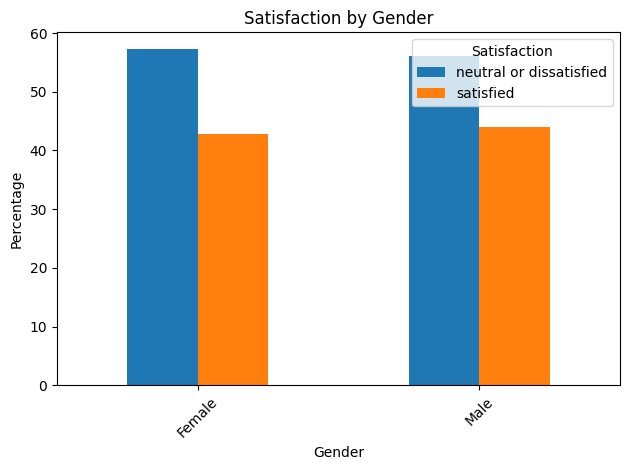

In [102]:
# Cell 22: Cinsiyet ve Memnuniyet İlişkisi

# 1. Memnuniyetin cinsiyete göre dağılımı
sat_by_type = pd.crosstab(df['Gender'], df['satisfaction'], normalize='index') * 100
print("Satisfaction by Gender (%):")
print(sat_by_type)

plt.figure(figsize=(8, 6))
sat_by_type.plot(kind='bar')
plt.title('Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

### Cinsiyet ve Memnuniyet İlişkisi
Kadın yolcularda memnun olmayan oran %57, erkek yolcularda %56 düzeyinde gerçekleşmiş olup, her iki cinsiyet grubu da benzer memnuniyet profili sergilemektedir. Memnun olan yolcu oranları ise kadınlarda %43, erkeklerde %44 olarak neredeyse eşit düzeydedir. Bu bulgular, havayolu hizmetlerinin cinsiyet bazında farklılaşan bir etki yaratmadığını

---

Satisfaction by Customer Type (%):
satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                   52.270881  47.729119
disloyal Customer                76.334229  23.665771


<Figure size 800x600 with 0 Axes>

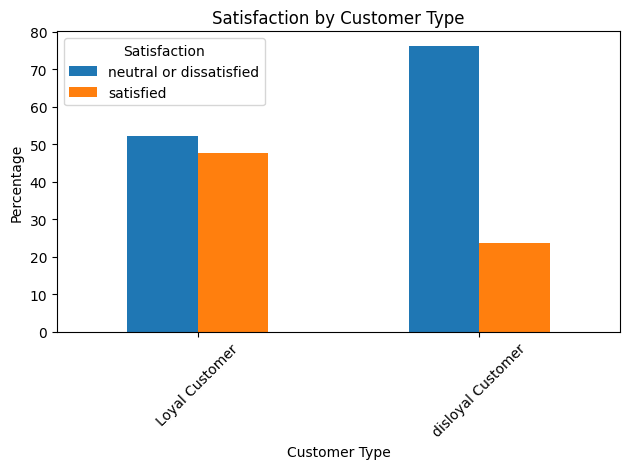

In [104]:
# Cell 23: Müşteri Türü ve Memnuniyet İlişkisi

# 2. Memnuniyetin müşteri türüne göre dağılımı
sat_by_type = pd.crosstab(df['Customer Type'], df['satisfaction'], normalize='index') * 100
print("Satisfaction by Customer Type (%):")
print(sat_by_type)

plt.figure(figsize=(8, 6))
sat_by_type.plot(kind='bar')
plt.title('Satisfaction by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

### Müşteri Türü ve Memnuniyet İlişkisi

Müşteri tipine göre memnuniyet analizi, havayolu için kritik bulgular ortaya koymaktadır. Sadık müşteriler arasında bile memnuniyetsizlik oranı %52 ile memnuniyet oranından (%48) yüksek çıkmış olup, bu durum hizmet kalitesinde ciddi sorunların varlığını işaret etmektedir. Sadık olmayan müşterilerde ise durum daha kritiktir, memnuniyetsizlik oranı %76'ya yükselirken, memnuniyet oranı sadece %24'te kalmaktadır.  
Sadık müşterilerin yarısından fazlasının hizmetlerden memnun olmaması, uzun vadede müşteri kaybı riskini artırmaktadır. Sadık olmayan müşterilerdeki yüksek memnuniyetsizlik oranı ise yeni müşteri kazanımında ve mevcut müşterileri elde tutmada zorlanıldığını ortaya koymaktadır.  

---


Satisfaction by Type of Travel (%):
satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                41.740283  58.259717
Personal Travel                89.832243  10.167757


<Figure size 800x600 with 0 Axes>

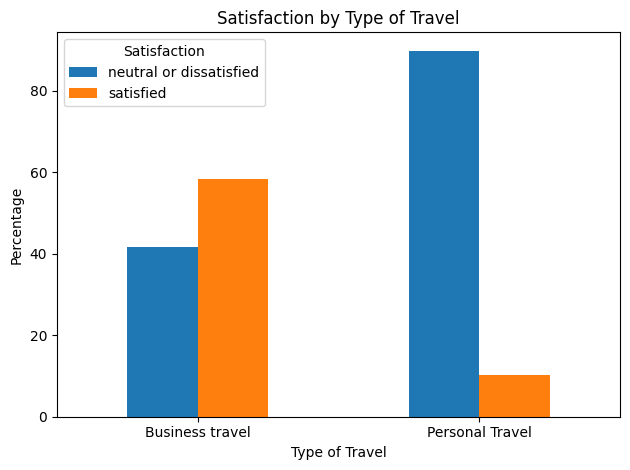

In [105]:
# Cell 24: Seyehat Türü ve Memnuniyet İlişkisi

# 3. Memnuniyetin seyehat türüne göre dağılımı
sat_by_class = pd.crosstab(df['Type of Travel'], df['satisfaction'], normalize='index') * 100
print("\nSatisfaction by Type of Travel (%):")
print(sat_by_class)

plt.figure(figsize=(8, 6))
sat_by_class.plot(kind='bar')
plt.title('Satisfaction by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

### Seyehat Türü ve Memnuniyet İlişkisi

İş seyahati yapan müşteriler arasında memnuniyet oranı %59 ile memnuniyetsizlik oranını (%41) geçerken, kişisel seyahat eden müşterilerde durum tamamen tersine dönmektedir. Kişisel seyahat edenlerde memnuniyetsizlik oranı %86'ya yükselirken, memnuniyet oranı sadece %14'te kalmaktadır. 
İş seyahati segmentinin havayolu için daha kârlı olması nedeniyle bu segmente odaklanılmış olabileceği ya da iş seyehati yapanların zaman odaklı olmaları sebebiyle temel operasyonel ihtiyaçları (zamanında kalkış-varış, bagaj güvenliği) karşılandığında memnun olma eğiliminde olduklarını gösterebilir. 

---

Satisfaction by Class (%):
satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                    30.574852  69.425148
Eco                         81.386245  18.613755
Eco Plus                    75.393648  24.606352


<Figure size 800x600 with 0 Axes>

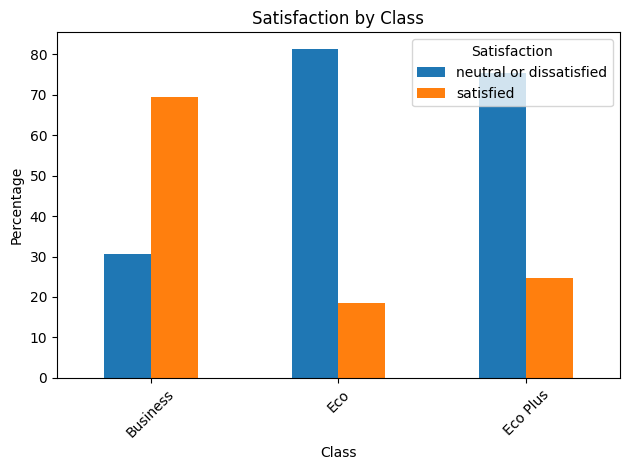

In [106]:
# Cell 25: Seyehat Sınıfı ve Memnuniyet İlişkisi

# 4. Memnuniyetin seyehat sınıfına göre dağılımı
sat_by_type = pd.crosstab(df['Class'], df['satisfaction'], normalize='index') * 100
print("Satisfaction by Class (%):")
print(sat_by_type)

plt.figure(figsize=(8, 6))
sat_by_type.plot(kind='bar')
plt.title('Satisfaction by Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

### Seyehat Sınıfı ve Memnuniyet İlişkisi

Sınıf bazında memnuniyet analizi, havayolunun hizmet kalitesindeki sınıf ayrımının ne kadar belirgin olduğunu ortaya koymaktadır. Business Class yolcuları arasında memnuniyet oranı %69 ile oldukça yüksek düzeyde gerçekleşirken, Economy Class'ta bu oran %18'e düşmekte ve Economy Plus'ta da sadece %25'e yükselmektedir.
Bu bulgular, Business Class yolcularına sunulan hizmet kalitesi beklentileri büyük ölçüde karşılarken, Economy segmentindeki hizmet standardı ciddi eksiklikler barındırmaktadır. Economy Plus'ın Economy'den sadece marginal bir iyileşme göstermesi ise bu ara segment için ödenen ek ücretin karşılığının verilmediğini işaret etmektedir.

---